In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
file = r'C:\Users\kid\SynologyDrive\Lab2023\KIDs\QTLab2324\IR_SING_PHOT\API\pic_nic_perfetto.txt'

In [11]:
data = pd.read_csv(file, sep='\t')

In [22]:
f = np.array(data['F'])
i = np.array(data['I'])
q = np.array(data['Q'])
c = q+1j*i
s = np.abs(c)
p = np.unwrap(np.angle(c))

In [65]:
len_fit = int(np.floor(len(i)/10))
i_amp = np.polyfit(f[:len_fit], i[:len_fit], 2)
q_amp = np.polyfit(f[:len_fit], q[:len_fit], 2)
I_rms = np.sqrt(np.mean((np.polyval(i_amp, f[:len_fit])-i[:len_fit])**2))   
Q_rms = np.sqrt(np.mean((np.polyval(q_amp, f[:len_fit])-q[:len_fit])**2))   

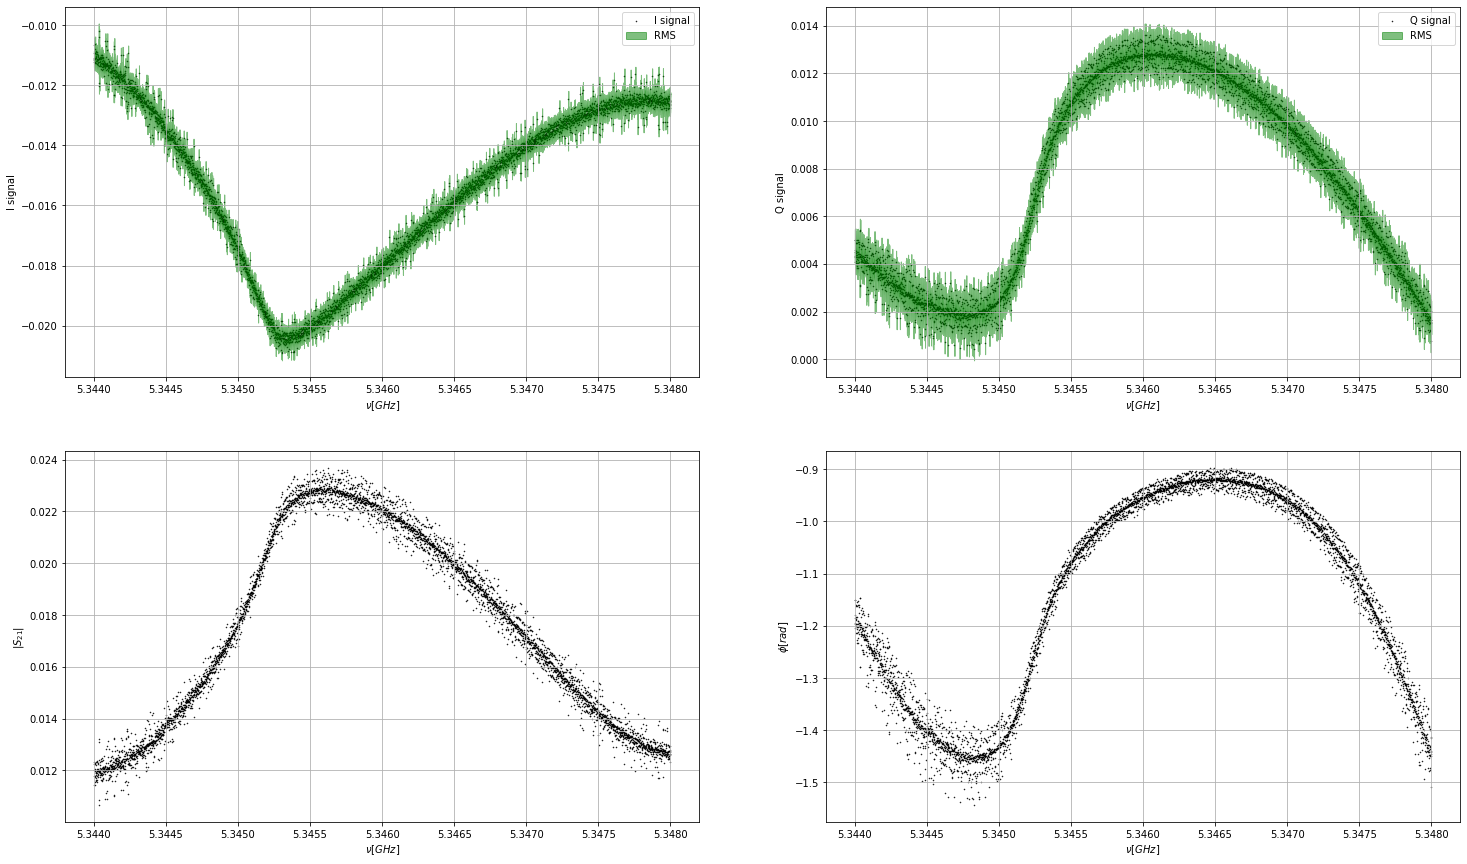

In [72]:
fig, axs = plt.subplots(2,2,figsize=(25,15))
axs[0][0].scatter(f,i,label='I signal', marker='.',color='black',s=1)
axs[0][1].scatter(f,q,label='Q signal', marker='.',color='black',s=1)
axs[0][0].fill_between(f, i+I_rms, i-I_rms, alpha=0.5, color='green',label='RMS')
axs[0][1].fill_between(f, q+Q_rms, q-Q_rms, alpha=0.5, color='green',label='RMS')
axs[0][0].set_xlabel(r'$\nu [GHz]$')
axs[0][0].set_ylabel(r'I signal')
axs[0][1].set_xlabel(r'$\nu [GHz]$')
axs[0][1].set_ylabel(r'Q signal')
axs[0][0].grid()
axs[0][1].grid()
axs[0][0].legend()
axs[0][1].legend()

axs[1][0].scatter(f,s, marker='.',color='black',s=1)
#axs[1][0].scatter(xv,yv, marker='x',color='red',s=10)
axs[1][1].scatter(f,p, marker='.',color='black',s=1)
#axs[1][1].scatter(xv,yv, marker='x',color='red',s=10)
axs[1][0].set_xlabel(r'$\nu [GHz]$')
axs[1][0].set_ylabel(r'$|S_{21}|$')
axs[1][1].set_xlabel(r'$\nu [GHz]$')
axs[1][1].set_ylabel(r'$\phi [rad]$')
axs[1][0].grid()
axs[1][1].grid()

In [56]:
def compute_der(dx,y):
    d = []
    for i in range(len(y)):
        if(i+1<len(y)):
            d.append((y[i+1]-y[i])/dx)
        else:
            pass
    return d

In [74]:
from scipy.signal import savgol_filter

def compute_derivative_savgol(y, dx, window_length, polyorder):
    """Compute the derivative of y using Savitzky-Golay filter."""
    y_deriv = savgol_filter(y, window_length, polyorder, deriv=1, delta=dx)
    return y_deriv

In [81]:
dx = f[1] - f[0]
i_prime = compute_derivative_savgol(i, dx, 71, 3)
q_prime = compute_derivative_savgol(q, dx, 71, 3)

In [83]:
def find_max_noisy_signal(x, y, window_length, polyorder):
    """Smooth the noisy signal using Savitzky-Golay filter and find the maximum."""
    y_smooth = savgol_filter(y, window_length, polyorder)
    max_index = np.argmax(y_smooth)
    return x[max_index], y_smooth[max_index], y_smooth

In [88]:
xi,yi,_ = find_max_noisy_signal(f, i, 11, 3)
xq,yq,_ = find_max_noisy_signal(f, i, 11, 3)

In [89]:
print(xi,yi)

5.344002400480096 -0.010944315228651838


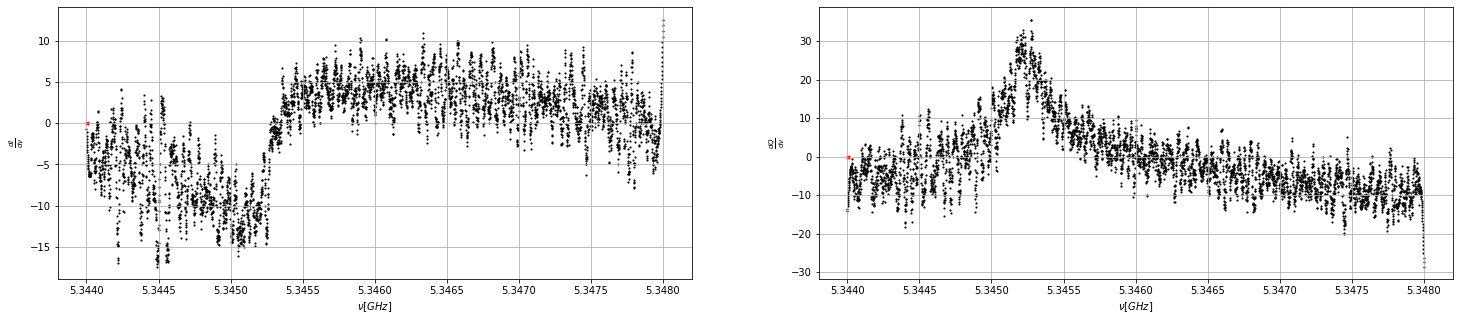

In [90]:
fig, axs = plt.subplots(1,2,figsize=(25,5))
axs[0].scatter(f,i_prime,label='I signal', marker='.',color='black',s=5)
axs[1].scatter(f,q_prime,label='Q signal', marker='.',color='black',s=5)
axs[0].scatter(xi,yi,marker='x',s=10,color='red')
axs[1].scatter(xq,yq,marker='x',s=10,color='red')
axs[0].set_xlabel(r'$\nu [GHz]$')
axs[0].set_ylabel(r'$\frac{dI}{d\nu}$')
axs[1].set_xlabel(r'$\nu [GHz]$')
axs[1].set_ylabel(r'$\frac{dQ}{d\nu}$')
axs[0].grid()
axs[1].grid()